In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
#extract a shareable link from google drive where the cleaned dataset resides
#original google drive link - https://drive.google.com/file/d/15GIUBigbnX95NH7K84UbYhkKp9nP9wCl/view?usp=share_link
#change the format of the link by noting the ID and assign it to a variable link

cleaned_data_link = 'https://drive.google.com/uc?id=15GIUBigbnX95NH7K84UbYhkKp9nP9wCl'

In [ ]:
data = pd.read_csv(cleaned_data_link) #load the dataset from google drive link
data = data.drop(columns = ['Product ID', 'Type'])
data

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,298.1,308.6,1551.0,42.8,0,0,0,0,0,0,0
1,2,298.2,308.7,1408.0,46.3,3,0,0,0,0,0,0
2,3,298.1,308.5,1498.0,49.4,5,0,0,0,0,0,0
3,4,298.2,308.6,1433.0,39.5,7,0,0,0,0,0,0
4,5,298.2,308.7,1408.0,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,298.8,308.4,1604.0,29.5,14,0,0,0,0,0,0
9996,9997,298.9,308.4,1632.0,31.8,17,0,0,0,0,0,0
9997,9998,299.0,308.6,1645.0,33.4,22,0,0,0,0,0,0
9998,9999,299.0,308.7,1408.0,48.5,25,0,0,0,0,0,0


In [ ]:
data.rename(columns={'Machine failure': 'Machine_failure'}, inplace=True)

In [ ]:
data['Machine_failure'].value_counts()

0    9661
1     339
Name: Machine_failure, dtype: int64

In [ ]:
# 0: 'not_failure' - Represents instances where the machine is not in a failure state
# 1: 'failure' - Represents instances where the machine is in a failure state
Machine_failure ={0:'not_failure', 1:'failure'}
data["Machine_failure"].value_counts().rename(index=Machine_failure)

not_failure    9661
failure         339
Name: Machine_failure, dtype: int64

The data in the 'Machine_failure' column shows a significant class imbalance,
with 'not_failure' instances dominating over 'failure' instances (9661 vs. 339).
To address this, we'll perform oversampling on the 'failure' class to achieve a more balanced dataset.


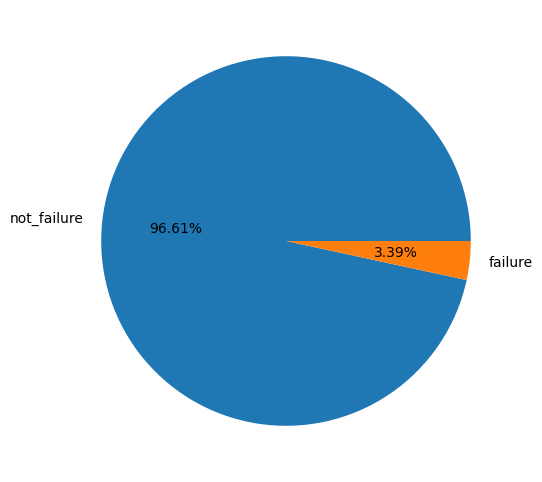

In [ ]:
plt.figure(figsize=(8,6))
plt.pie(data['Machine_failure'].value_counts(),labels=Machine_failure.values(),autopct='%1.2f%%')
plt.show()

In [ ]:
data.corr()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine_failure,TWF,HDF,PWF,OSF,RNF
UDI,1.000000,0.117428,0.324428,-0.001965,0.002596,-0.010702,-0.022892,0.009154,-0.022215,-0.023557,-0.000990,-0.005954
Air temperature [K],0.117428,1.000000,0.876107,0.021305,-0.013861,0.013853,0.082556,0.009955,0.137831,0.003470,0.001988,0.017688
Process temperature [K],0.324428,0.876107,1.000000,0.019892,-0.014294,0.013488,0.035946,0.007315,0.056933,-0.003355,0.004554,0.022279
Rotational speed [rpm],-0.001965,0.021305,0.019892,1.000000,-0.911734,0.002496,-0.130467,0.009470,-0.139822,-0.005571,-0.120227,-0.013237
Torque [Nm],0.002596,-0.013861,-0.014294,-0.911734,1.000000,-0.003151,0.190806,-0.014718,0.143202,0.081435,0.182016,0.016240
Tool wear [min],-0.010702,0.013853,0.013488,0.002496,-0.003151,1.000000,0.105448,0.115792,-0.001287,-0.009334,0.155894,0.011326
Machine_failure,-0.022892,0.082556,0.035946,-0.130467,0.190806,0.105448,1.000000,0.362904,0.575800,0.522812,0.531083,0.004516
TWF,0.009154,0.009955,0.007315,0.009470,-0.014718,0.115792,0.362904,1.000000,-0.007332,0.008577,0.038243,0.030970
HDF,-0.022215,0.137831,0.056933,-0.139822,0.143202,-0.001287,0.575800,-0.007332,1.000000,0.018443,0.046396,-0.004706
PWF,-0.023557,0.003470,-0.003355,-0.005571,0.081435,-0.009334,0.522812,0.008577,0.018443,1.000000,0.115836,-0.004273


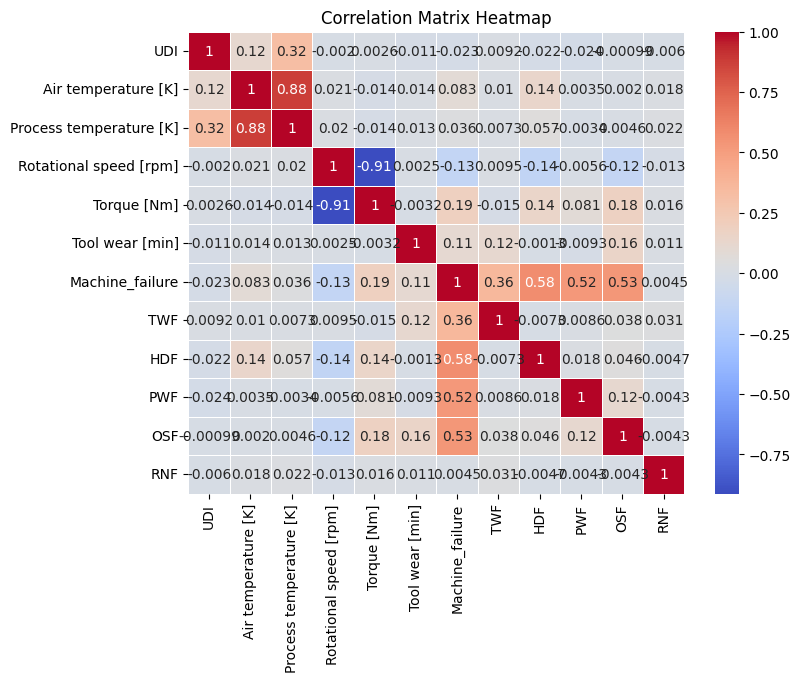

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Handling Class Imbalance through Upsampling


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

# Separate majority and minority classes
majority = data[data['Machine_failure'] == 0]
minority = data[data['Machine_failure'] == 1]

# Upsample minority class
minority_upsampled = resample(minority, replace=True, n_samples=len(majority), random_state=42)
upsampled = pd.concat([majority, minority_upsampled])

# Splitting the data
X = upsampled.drop('Machine_failure', axis=1)
y = upsampled['Machine_failure']

In [ ]:
upsampled

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine_failure,TWF,HDF,PWF,OSF,RNF
0,1,298.1,308.6,1551.0,42.8,0,0,0,0,0,0,0
1,2,298.2,308.7,1408.0,46.3,3,0,0,0,0,0,0
2,3,298.1,308.5,1498.0,49.4,5,0,0,0,0,0,0
3,4,298.2,308.6,1433.0,39.5,7,0,0,0,0,0,0
4,5,298.2,308.7,1408.0,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2749,2750,299.7,309.2,1685.0,28.9,179,1,0,0,0,0,0
4759,4760,303.5,311.6,1361.0,46.5,62,1,0,1,0,0,0
3695,3696,302.2,311.3,1530.0,37.3,207,1,1,0,0,0,0
7087,7088,300.6,310.3,1648.0,30.5,217,1,1,0,0,0,0


In [ ]:
upsampled.to_csv('Group_5_UpsampledDataset.csv', index=False)

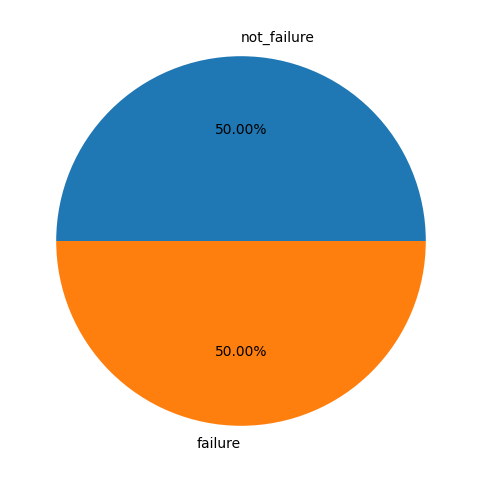

In [ ]:
plt.figure(figsize=(8,6))
plt.pie(upsampled['Machine_failure'].value_counts(),labels=Machine_failure.values(),autopct='%1.2f%%')
plt.show()

In [ ]:
X = upsampled.drop('Machine_failure', axis=1)
y = upsampled['Machine_failure']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#KNN

In [ ]:
# Training the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predictions
y_pred = knn.predict(X_test_scaled)

# Evaluating the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
accuracy_knn = accuracy_score(y_test, y_pred)

Confusion Matrix:
[[1930   12]
 [   0 1923]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1942
           1       0.99      1.00      1.00      1923

    accuracy                           1.00      3865
   macro avg       1.00      1.00      1.00      3865
weighted avg       1.00      1.00      1.00      3865

Accuracy Score: 0.9968952134540751


#KNN model using the hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # You can adjust the range based on your problem
    'weights': ['uniform', 'distance'],  # Options for the weight function
    'metric': ['euclidean', 'manhattan']  # Distance metric options
}

In [ ]:
# Create a KNN classifier
knn = KNeighborsClassifier()

In [ ]:
# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters found by grid search
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}


In [ ]:
# Get the best model from grid search
best_knn = grid_search.best_estimator_

# Make predictions using the best model
y_pred_best = best_knn.predict(X_test_scaled)

In [ ]:
# Evaluating the best model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))
print("Accuracy Score:", accuracy_score(y_test, y_pred_best))

# Save the best accuracy score
accuracy_knn_best = accuracy_score(y_test, y_pred_best)

Confusion Matrix:
[[1935    7]
 [   0 1923]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1942
           1       1.00      1.00      1.00      1923

    accuracy                           1.00      3865
   macro avg       1.00      1.00      1.00      3865
weighted avg       1.00      1.00      1.00      3865

Accuracy Score: 0.9981888745148771


#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Training the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # n_estimators can be tuned
rf_classifier.fit(X_train_scaled, y_train)

# Predicting on the test set
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluating the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
accuracy_rfc = accuracy_score(y_test, y_pred)

Confusion Matrix:
[[1942    0]
 [   0 1923]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1942
           1       1.00      1.00      1.00      1923

    accuracy                           1.00      3865
   macro avg       1.00      1.00      1.00      3865
weighted avg       1.00      1.00      1.00      3865

Accuracy Score: 1.0


#Random Forest using best hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],  # You can adjust the range based on your problem
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

In [ ]:
# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [ ]:
# Print the best parameters found by grid search
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model from grid search
best_rf_classifier = grid_search.best_estimator_

# Make predictions using the best model
y_pred_best = best_rf_classifier.predict(X_test_scaled)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [91]:
# Evaluating the best model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))
print("Accuracy Score:", accuracy_score(y_test, y_pred_best))

# Save the best accuracy score
accuracy_rfc_best = accuracy_score(y_test, y_pred_best)

Confusion Matrix:
[[1942    0]
 [   0 1923]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1942
           1       1.00      1.00      1.00      1923

    accuracy                           1.00      3865
   macro avg       1.00      1.00      1.00      3865
weighted avg       1.00      1.00      1.00      3865

Accuracy Score: 1.0


In [ ]:
pip install xgboost

#XGBoost

In [ ]:
import xgboost as xgb

# Training the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = xgb_model.predict(X_test_scaled)

# Evaluating the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
accuracy_xgboost = accuracy_score(y_test, y_pred)

Confusion Matrix:
[[1941    1]
 [   0 1923]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1942
           1       1.00      1.00      1.00      1923

    accuracy                           1.00      3865
   macro avg       1.00      1.00      1.00      3865
weighted avg       1.00      1.00      1.00      3865

Accuracy Score: 0.9997412677878396


#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
# Training the Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = logistic_model.predict(X_test_scaled)

# Evaluating the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
accuracy_logistic = accuracy_score(y_test, y_pred)

Confusion Matrix:
[[1942    0]
 [  53 1870]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1942
           1       1.00      0.97      0.99      1923

    accuracy                           0.99      3865
   macro avg       0.99      0.99      0.99      3865
weighted avg       0.99      0.99      0.99      3865

Accuracy Score: 0.986287192755498


#Logistic Regression model using hyperparameters

In [84]:
from sklearn.linear_model import LogisticRegression
penalty = 'l2'
C = 1.0
solver = 'lbfgs'  # or 'newton-cg', 'liblinear', 'sag', 'saga'

# Create a LogisticRegression model with specified hyperparameters
logistic_model = LogisticRegression(penalty=penalty, C=C, solver=solver)


# Train the model
logistic_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Save the accuracy score if needed
accuracy_logistic_best = accuracy_score(y_test, y_pred)

Confusion Matrix:
[[1942    0]
 [  53 1870]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1942
           1       1.00      0.97      0.99      1923

    accuracy                           0.99      3865
   macro avg       0.99      0.99      0.99      3865
weighted avg       0.99      0.99      0.99      3865

Accuracy Score: 0.986287192755498


#Support Vector Machine with linear kernel

In [ ]:
from sklearn.svm import SVC

# Training the linear SVM model
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_scaled, y_train)

# Predictions and evaluation for linear SVM
y_pred_linear = svm_linear.predict(X_test_scaled)
print("Linear SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))
print("\nLinear SVM Classification Report:\n", classification_report(y_test, y_pred_linear))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
accuracy_linear_svm = accuracy_score(y_test, y_pred)

Linear SVM Confusion Matrix:
 [[1942    0]
 [  53 1870]]

Linear SVM Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      1942
           1       1.00      0.97      0.99      1923

    accuracy                           0.99      3865
   macro avg       0.99      0.99      0.99      3865
weighted avg       0.99      0.99      0.99      3865

Accuracy Score: 0.986287192755498


#Tuning the hyper parameters for SVM linear

In [ ]:
# defining parameter range
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_svc_lin = GridSearchCV(svm_linear, param_grid, cv=5, verbose = 3)

# fitting the model for grid search
grid_svc_lin.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ............................C=0.01;, score=0.987 total time=   0.4s
[CV 2/5] END ............................C=0.01;, score=0.986 total time=   0.4s
[CV 3/5] END ............................C=0.01;, score=0.986 total time=   1.1s
[CV 4/5] END ............................C=0.01;, score=0.988 total time=   1.8s
[CV 5/5] END ............................C=0.01;, score=0.991 total time=   1.7s
[CV 1/5] END .............................C=0.1;, score=0.987 total time=   0.8s
[CV 2/5] END .............................C=0.1;, score=0.986 total time=   0.5s
[CV 3/5] END .............................C=0.1;, score=0.986 total time=   0.5s
[CV 4/5] END .............................C=0.1;, score=0.988 total time=   0.4s
[CV 5/5] END .............................C=0.1;, score=0.991 total time=   0.7s
[CV 1/5] END ...............................C=1;, score=0.987 total time=   0.4s
[CV 2/5] END ...............................C=1;,

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, verbose=3)

In [75]:
# print best parameter after tuning
print(grid_svc_lin.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_svc_lin.best_estimator_)

{'C': 0.01}
SVC(C=0.01, kernel='linear')


In [85]:
grid_predictions_svc_lin = grid_svc_lin.predict(X_test_scaled)
print(f" The testing data accuracy for the SVC linear model using best params is {accuracy_score(y_test, grid_predictions_svc_lin)}")
accuracy_linear_svm_best = accuracy_score(y_test, y_pred)

 The testing data accuracy for the SVC linear model using best params is 0.986287192755498


In [82]:
# print classification report
print(classification_report(y_test, grid_predictions_svc_lin))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1942
           1       1.00      0.97      0.99      1923

    accuracy                           0.99      3865
   macro avg       0.99      0.99      0.99      3865
weighted avg       0.99      0.99      0.99      3865



#SVM with non linear kernel

In [ ]:
# Training the non-linear SVM model
svm_non_linear = SVC(kernel='rbf')  # 'rbf' is default, but explicitly stating for clarity
svm_non_linear.fit(X_train_scaled, y_train)

# Predictions and evaluation for non-linear SVM
y_pred_non_linear = svm_non_linear.predict(X_test_scaled)
print("Non-Linear SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_non_linear))
print("\nNon-Linear SVM Classification Report:\n", classification_report(y_test, y_pred_non_linear))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
accuracy_non_linear_svm = accuracy_score(y_test, y_pred)

Non-Linear SVM Confusion Matrix:
 [[1942    0]
 [  53 1870]]

Non-Linear SVM Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      1942
           1       1.00      0.97      0.99      1923

    accuracy                           0.99      3865
   macro avg       0.99      0.99      0.99      3865
weighted avg       0.99      0.99      0.99      3865

Accuracy Score: 0.986287192755498


ROC curve for random Forest classifier

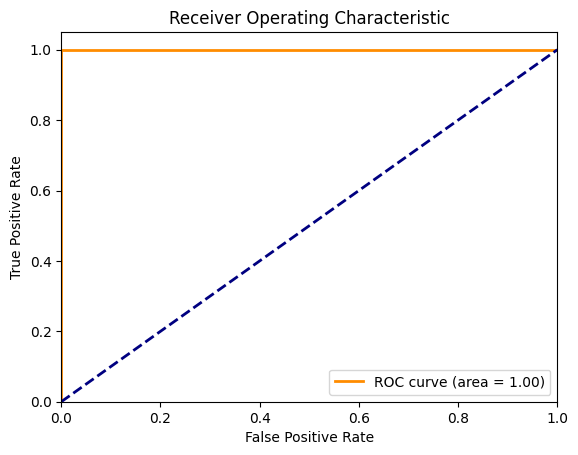

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Predict probabilities
y_pred_prob = rf_classifier.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#Accuracy for all models

In [96]:
models = ['KNN', 'KNN (Best)', 'Logistic Regression', 'Logistic Regression (Best)', 'Linear SVM', 'Linear SVM (Best)', 'Non-Linear SVM', 'Random Forest', 'Random Forest (Best)', 'XGBoost']
accuracy = [accuracy_knn, accuracy_knn_best, accuracy_logistic, accuracy_logistic_best, accuracy_linear_svm, accuracy_linear_svm_best, accuracy_non_linear_svm, accuracy_rfc, accuracy_rfc_best, accuracy_xgboost]

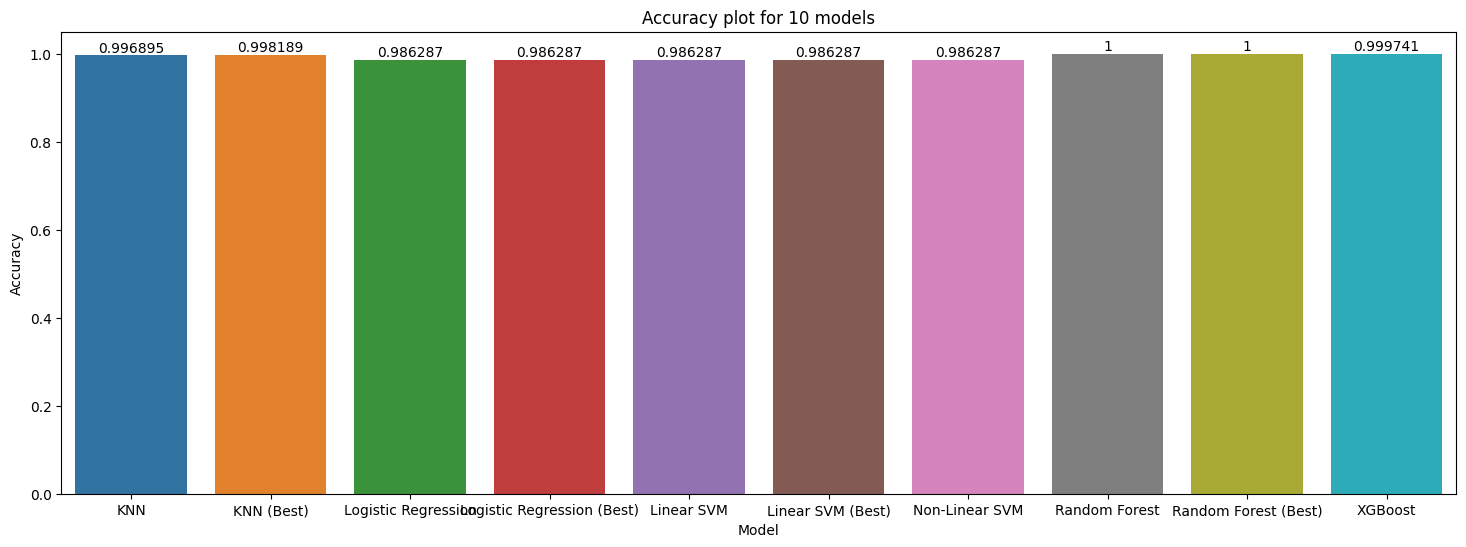

In [99]:
# sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(18, 6))
ax = sns.barplot(x=models, y=accuracy)
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10)
plt.xticks(range(len(models)), models)
plt.title(f"Accuracy plot for {len(accuracy)} models")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()